In [71]:
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
import requests
from pprint import pprint

In [72]:
url = "https://api.frankfurter.app"
response = requests.get(url)
response

<Response [200]>

In [4]:
endpoint = url+f'/currencies'
response= requests.get(endpoint)
pprint(response.json())

{'AUD': 'Australian Dollar',
 'BGN': 'Bulgarian Lev',
 'BRL': 'Brazilian Real',
 'CAD': 'Canadian Dollar',
 'CHF': 'Swiss Franc',
 'CNY': 'Chinese Renminbi Yuan',
 'CZK': 'Czech Koruna',
 'DKK': 'Danish Krone',
 'EUR': 'Euro',
 'GBP': 'British Pound',
 'HKD': 'Hong Kong Dollar',
 'HUF': 'Hungarian Forint',
 'IDR': 'Indonesian Rupiah',
 'ILS': 'Israeli New Sheqel',
 'INR': 'Indian Rupee',
 'ISK': 'Icelandic Króna',
 'JPY': 'Japanese Yen',
 'KRW': 'South Korean Won',
 'MXN': 'Mexican Peso',
 'MYR': 'Malaysian Ringgit',
 'NOK': 'Norwegian Krone',
 'NZD': 'New Zealand Dollar',
 'PHP': 'Philippine Peso',
 'PLN': 'Polish Złoty',
 'RON': 'Romanian Leu',
 'SEK': 'Swedish Krona',
 'SGD': 'Singapore Dollar',
 'THB': 'Thai Baht',
 'TRY': 'Turkish Lira',
 'USD': 'United States Dollar',
 'ZAR': 'South African Rand'}


In [73]:
fechaInicioPandemia = '2020-01-30'
fechaFinPandemia= '2023-05-05'
cantidad=1
from_currency="EUR"
to_currency="USD"
endpoint = f"{url}/{fechaInicioPandemia}..{fechaFinPandemia}?amount={cantidad}&from={from_currency}&to={to_currency}"
response = requests.get(endpoint)
data=response.json()

In [74]:
fechaInicioPandemia = '2020-01-30'
fechaFinPandemia= '2023-05-05'
cantidad=1
from_currency="EUR"
to_currency='GBP'
endpoint = f"{url}/{fechaInicioPandemia}..{fechaFinPandemia}?amount={cantidad}&from={from_currency}&to={to_currency}"
response = requests.get(endpoint)
data2=response.json()

In [75]:
fechaInicioPandemia = '2020-01-30'
fechaFinPandemia= '2023-05-05'
cantidad=1
from_currency="EUR"
to_currency='CHF'
endpoint = f"{url}/{fechaInicioPandemia}..{fechaFinPandemia}?amount={cantidad}&from={from_currency}&to={to_currency}"
response = requests.get(endpoint)
data3=response.json()

In [80]:
fechaInicioPandemia = '2020-01-30'
fechaFinPandemia= '2023-05-05'
cantidad=1
from_currency="EUR"
to_currency='JPY'
endpoint = f"{url}/{fechaInicioPandemia}..{fechaFinPandemia}?amount={cantidad}&from={from_currency}&to={to_currency}"
response = requests.get(endpoint)
data4=response.json()

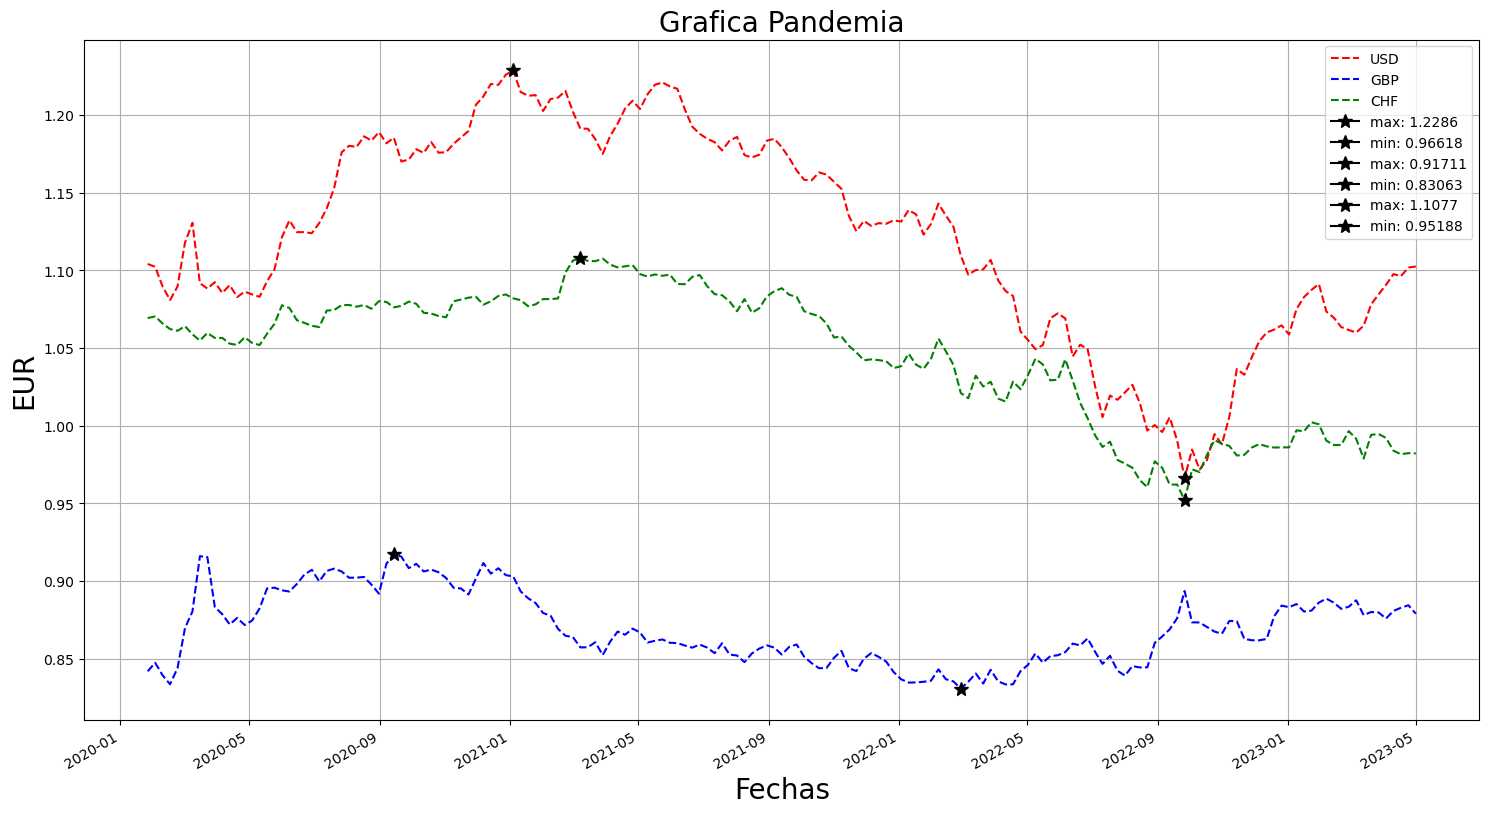

In [76]:
hazGrafica3(data,data2,data3,('EUR','USD'),('EUR','GBP'),('EUR','CHF'))

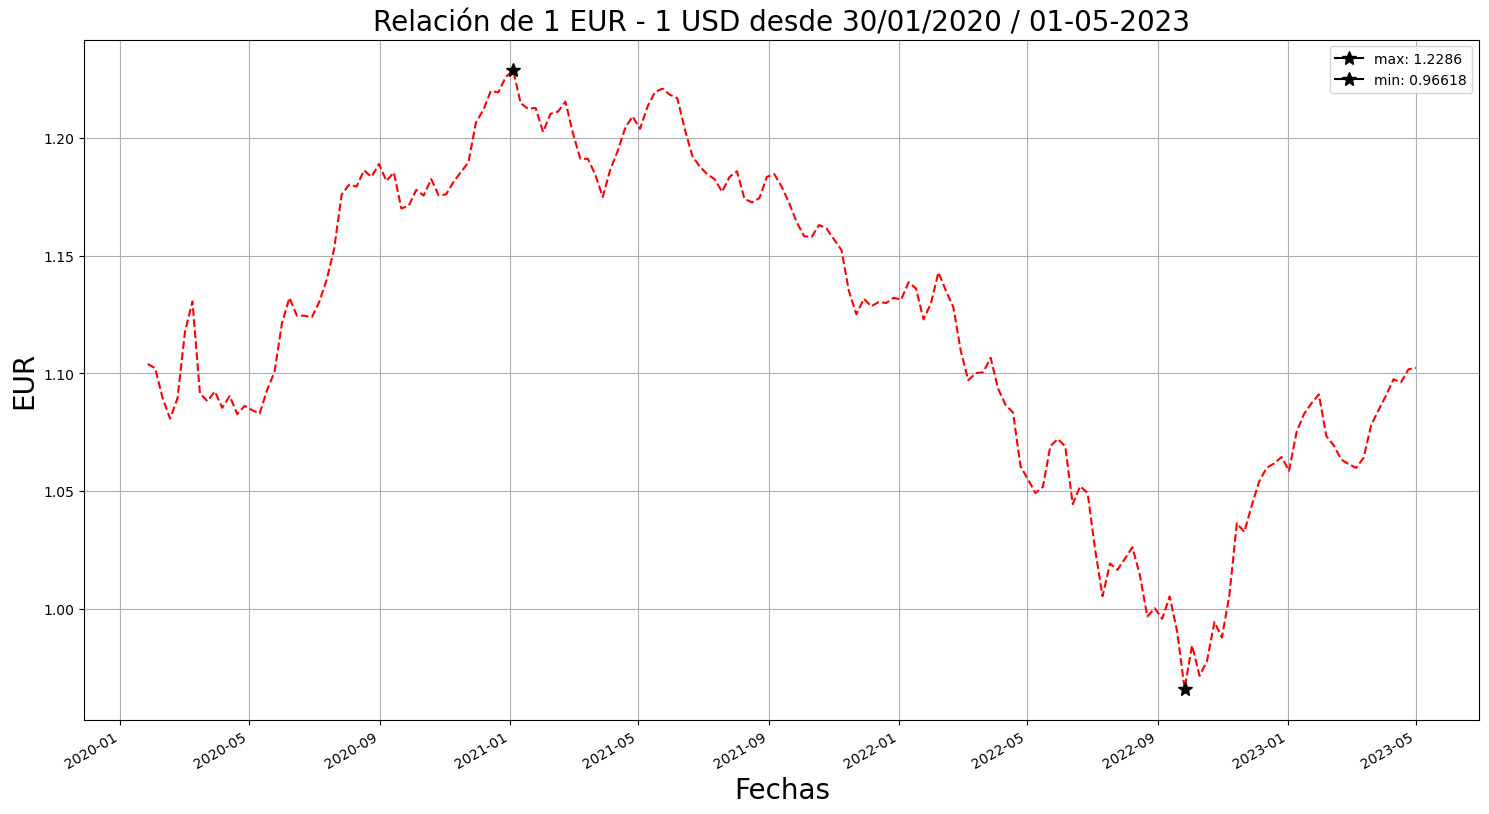

In [77]:
hazGrafica(data,('EUR','USD'),'red')

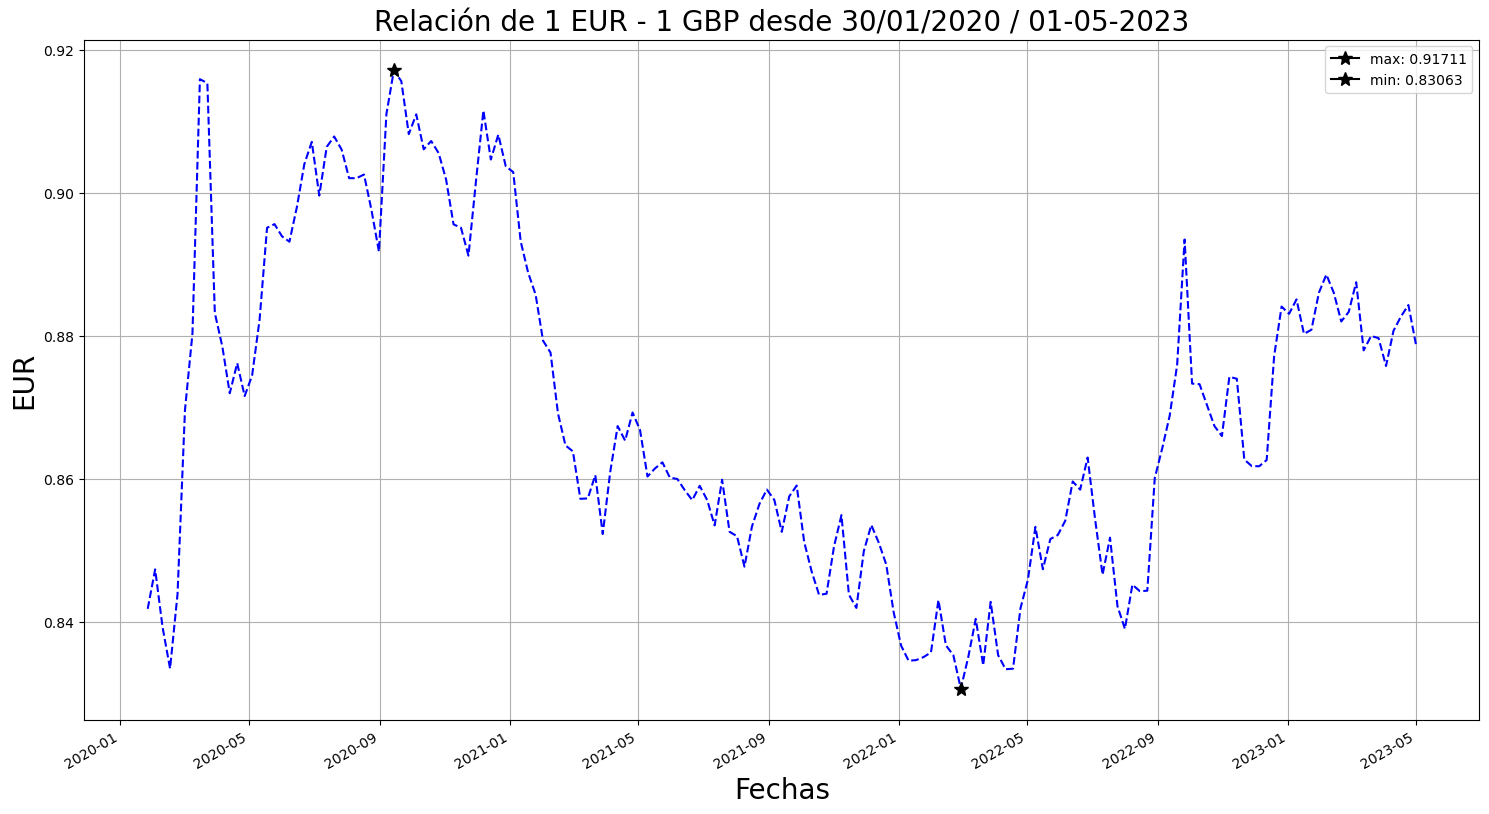

In [78]:
hazGrafica(data2,('EUR','GBP'),'blue')

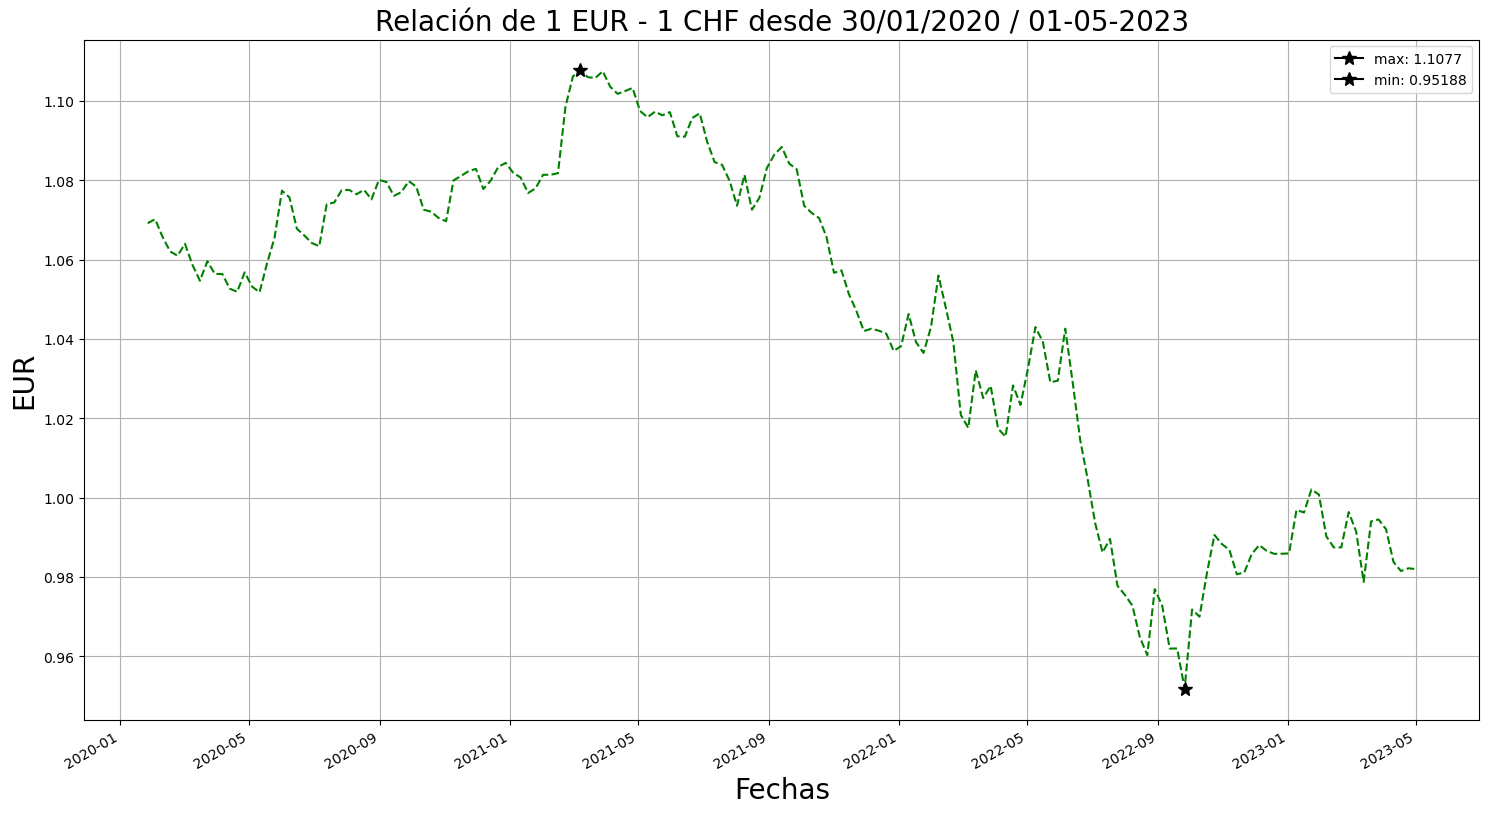

In [79]:
hazGrafica(data3,('EUR','CHF'),'green')


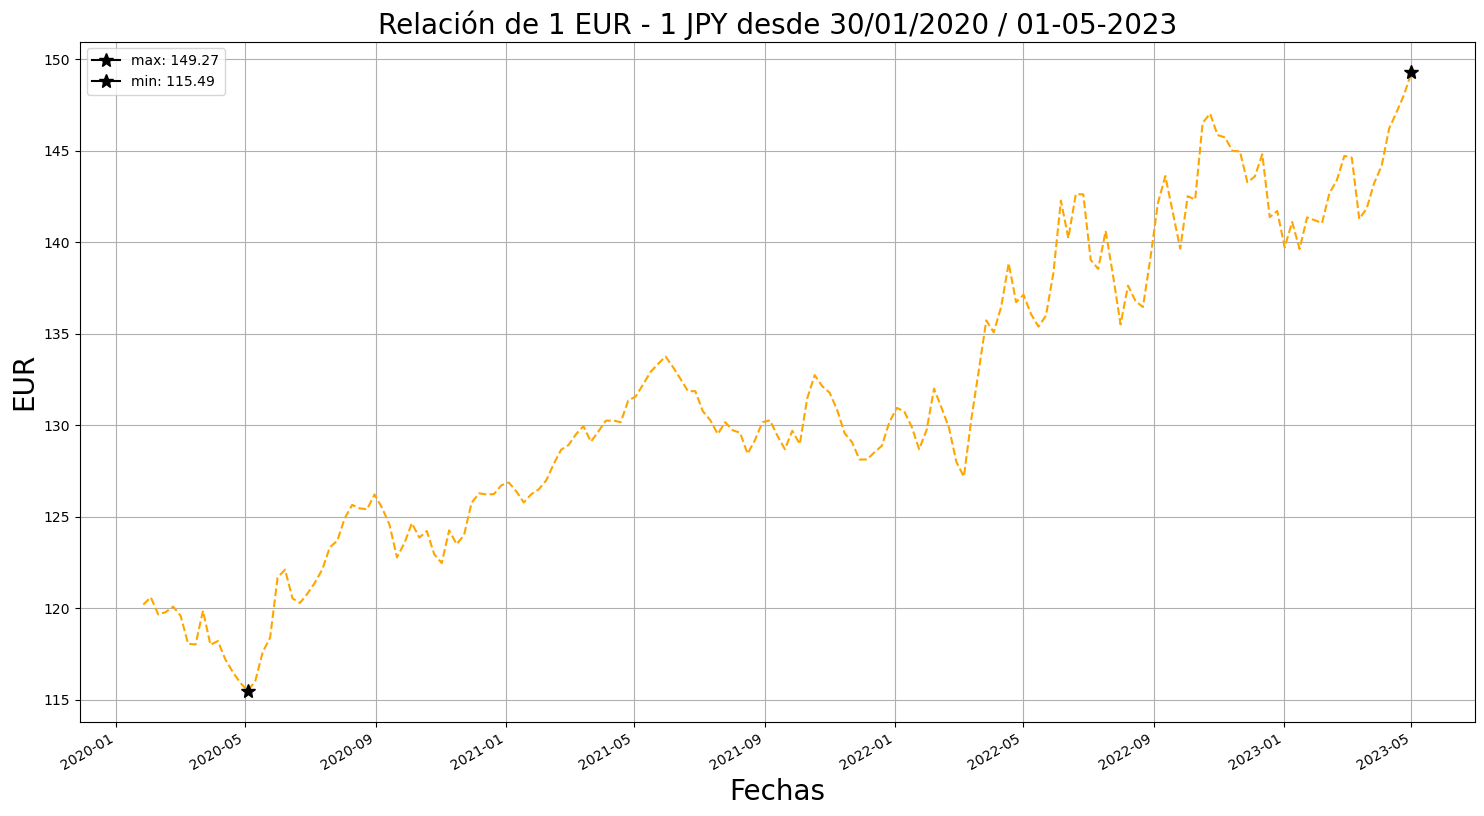

In [85]:
hazGrafica(data4,("EUR",'JPY'),'orange')

FUNCONES DE APOYO

In [59]:
def hazGrafica3(data,data2,data3,monedas,monedas2,monedas3)->None:
    #CONVERTIR LAS FECHAS A OBJETO DATETIME PARA LA PRIMERA DATA
    fechas=list(data['rates'].keys())
    fechas=[datetime.strptime(fecha,"%Y-%m-%d") for fecha in fechas]
    monedasCon=[data["rates"][fecha][monedas[1]] for fecha in data['rates'].keys()]
    #PARA LA SEGUNDA
    fechas2=list(data2['rates'].keys())
    fechas2=[datetime.strptime(fecha,'%Y-%m-%d') for fecha in fechas2]
    monedasCon2=[data2['rates'][fecha][monedas2[1]] for fecha in data2['rates'].keys()]
    #PARA LA TERCERA
    monedasCon3=[data3['rates'][fecha][monedas3[1]] for fecha in data3['rates'].keys()]
     
    
    
    
    
    
    
    
    plt.figure(figsize = (18, 10))
    plt.plot_date(x = fechas, y = monedasCon, fmt = "--",color='red',label=monedas[1])
    plt.plot_date(x = fechas, y = monedasCon2, fmt = "--",color='blue',label=monedas2[1])
    plt.plot_date(x = fechas, y = monedasCon3, fmt = "--",color='green',label=monedas3[1])
    
    # Evita que se sobrepongan las fechas
    plt.gcf().autofmt_xdate()
    #max min 1
    # max    np.argmax(monedasCon) devuelve el indice donde esta el valor maximo
    plt.plot(fechas[np.argmax(monedasCon)],
             np.max(monedasCon),
             color      = "black",
             marker     = "*",
             markersize = 10,
             label      = f"max: {np.max(monedasCon)}")
    # min
    plt.plot(fechas[np.argmin(monedasCon)],
             np.min(monedasCon),
             color      = "black",
             marker     = "*",
             markersize = 10,
             label      = f"min: {np.min(monedasCon)}")
     #max min 2
    # max    np.argmax(monedasCon) devuelve el indice donde esta el valor maximo
    plt.plot(fechas2[np.argmax(monedasCon2)],
             np.max(monedasCon2),
             color      = "black",
             marker     = "*",
             markersize = 10,
             label      = f"max: {np.max(monedasCon2)}")
    # min
    plt.plot(fechas2[np.argmin(monedasCon2)],
             np.min(monedasCon2),
             color      = "black",
             marker     = "*",
             markersize = 10,
             label      = f"min: {np.min(monedasCon2)}")
      #max min 3
    # max    np.argmax(monedasCon) devuelve el indice donde esta el valor maximo
    plt.plot(fechas[np.argmax(monedasCon3)],
             np.max(monedasCon3),
             color      = "black",
             marker     = "*",
             markersize = 10,
             label      = f"max: {np.max(monedasCon3)}")
    # min
    plt.plot(fechas[np.argmin(monedasCon3)],
             np.min(monedasCon3),
             color      = "black",
             marker     = "*",
             markersize = 10,
             label      = f"min: {np.min(monedasCon3)}")
    
    
    
    
    
    
    
    
    
    # Etiquetas
    plt.legend()
    plt.xlabel("Fechas", fontsize = 20)
    plt.ylabel(f'{monedas[0]}', fontsize = 20)
    plt.title(f'Grafica Pandemia', fontsize = 20)


    plt.grid()
    plt.show()
    
    

    
    

In [67]:
def hazGrafica(data,monedas,color)->None:
    #CONVERTIR LAS FECHAS A OBJETO DATETIME 
    fechas = list(data["rates"].keys())
    fechas = [datetime.strptime(fecha, "%Y-%m-%d") for fecha in fechas]

    
    monedasCon = [data["rates"][fecha][monedas[1]] for fecha in data["rates"].keys()]
  
    
    plt.figure(figsize = (18, 10))
    plt.plot_date(x = fechas, y = monedasCon, fmt = "--",color=color)

    # Evita que se sobrepongan las fechas
    plt.gcf().autofmt_xdate()

  # max    np.argmax(monedasCon) devuelve el indice donde esta el valor maximo
    plt.plot(fechas[np.argmax(monedasCon)],
             np.max(monedasCon),
             color      = "black",
             marker     = "*",
             markersize = 10,
             label      = f"max: {np.max(monedasCon)}")

    # min
    plt.plot(fechas[np.argmin(monedasCon)],
             np.min(monedasCon),
             color      = "black",
             marker     = "*",
             markersize = 10,
             label      = f"min: {np.min(monedasCon)}")

    
    
    
    
    # Etiquetas
    plt.legend()
    plt.xlabel("Fechas", fontsize = 20)
    plt.ylabel(f'{monedas[0]}', fontsize = 20)
    plt.title(f'Relación de 1 {monedas[0]} - 1 {monedas[1]} desde 30/01/2020 / {np.max(fechas).strftime("%d-%m-%Y")}', fontsize = 20)


    plt.grid()
    plt.show()